<a href="https://colab.research.google.com/github/Ganapathi-tech/Data-Science-Interview-preparation/blob/main/churn_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install category_encoders

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import RandomizedSearchCV
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,PowerTransformer,StandardScaler
from scipy.stats import chi2_contingency
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [ ]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

In [ ]:
train_data.head()

,id,age,gender,region_category,membership_category,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,1,53,M,City,Platinum Membership,Gift Vouchers/Coupons,?,Mobile_Data,11:27:02,8,523.92,12067.27,Error,765.970000,No,Yes,Yes,No Information Available,Poor Customer Service,3
1,2,42,M,Town,Basic Membership,Without Offers,Desktop,Fiber_Optic,04:53:09,5,839.85,1684.87,5,637.840000,No,Yes,Yes,Solved in Follow-up,No reason specified,5
2,3,38,F,Village,No Membership,Credit/Debit Card Offers,Desktop,Mobile_Data,08:18:32,22,462.57,19576.06,6,648.890000,Yes,Yes,No,Not Applicable,Too many ads,4
3,4,36,M,Town,No Membership,Without Offers,Desktop,Mobile_Data,23:56:29,22,99.90,19549.59,25,646.430000,No,Yes,Yes,Solved in Follow-up,Poor Product Quality,5
4,5,15,F,Town,No Membership,Credit/Debit Card Offers,Smartphone,Wi-Fi,10:22:11,9,31.64,12125.61,19,1137.970074,No,Yes,No,Not Applicable,No reason specified,5


In [ ]:
test_data.head()

,id,age,gender,region_category,membership_category,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,30814,34,M,City,Basic Membership,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,08:35:05,10,89.76,21318.19,6,NaN,No,Yes,No,Not Applicable,Poor Product Quality
1,30815,39,M,Town,No Membership,Credit/Debit Card Offers,Smartphone,Fiber_Optic,15:39:05,9,241.74,33170.16,6,551.11,Yes,No,Yes,No Information Available,No reason specified
2,30816,26,M,NaN,No Membership,Without Offers,Desktop,Wi-Fi,14:55:59,3,215.89,41979.65,9,NaN,No,Yes,No,Not Applicable,Too many ads
3,30817,36,M,Village,Silver Membership,Gift Vouchers/Coupons,?,Mobile_Data,06:06:05,2,691.09,17989.46,Error,NaN,No,Yes,Yes,Solved,No reason specified
4,30818,12,M,City,Premium Membership,Without Offers,Desktop,Mobile_Data,22:27:40,8,33.09,55607.35,Error,NaN,Yes,No,No,Not Applicable,User Friendly Website


In [ ]:
print("There are {} number of rows and {} number of columns in training data".format(train_data.shape[0],train_data.shape[1]))
print("There are {} number of rows and {} number of columns in testing data".format(test_data.shape[0],test_data.shape[1]))

There are 30813 number of rows and 20 number of columns in training data
There are 5016 number of rows and 19 number of columns in testing data


In [ ]:
# Describing training data
train_data.describe()

,id,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,30813.000000,30813.000000,30813.000000,30813.000000,30813.000000,27939.000000,30813.000000
mean,15407.000000,37.116704,-42.887969,242.869252,29264.465647,687.123214,3.612534
std,8895.091259,15.853256,230.748995,396.604487,19463.080700,193.567641,1.174105
min,1.000000,10.000000,-999.000000,-2814.109110,800.460000,-549.357498,1.000000
25%,7704.000000,23.000000,8.000000,59.630000,14208.520000,616.220000,3.000000
50%,15407.000000,37.000000,12.000000,161.370000,27443.200000,697.950000,4.000000
75%,23110.000000,51.000000,16.000000,354.660000,40816.670000,763.770000,5.000000
max,30813.000000,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30813 entries, 0 to 30812
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            30813 non-null  int64  
 1   age                           30813 non-null  int64  
 2   gender                        30813 non-null  object 
 3   region_category               26282 non-null  object 
 4   membership_category           30813 non-null  object 
 5   preferred_offer_types         30576 non-null  object 
 6   medium_of_operation           30813 non-null  object 
 7   internet_option               30813 non-null  object 
 8   last_visit_time               30813 non-null  object 
 9   days_since_last_login         30813 non-null  int64  
 10  avg_time_spent                30813 non-null  float64
 11  avg_transaction_value         30813 non-null  float64
 12  avg_frequency_login_days      30813 non-null  object 
 13  p

**DATA PREPROCESSING**

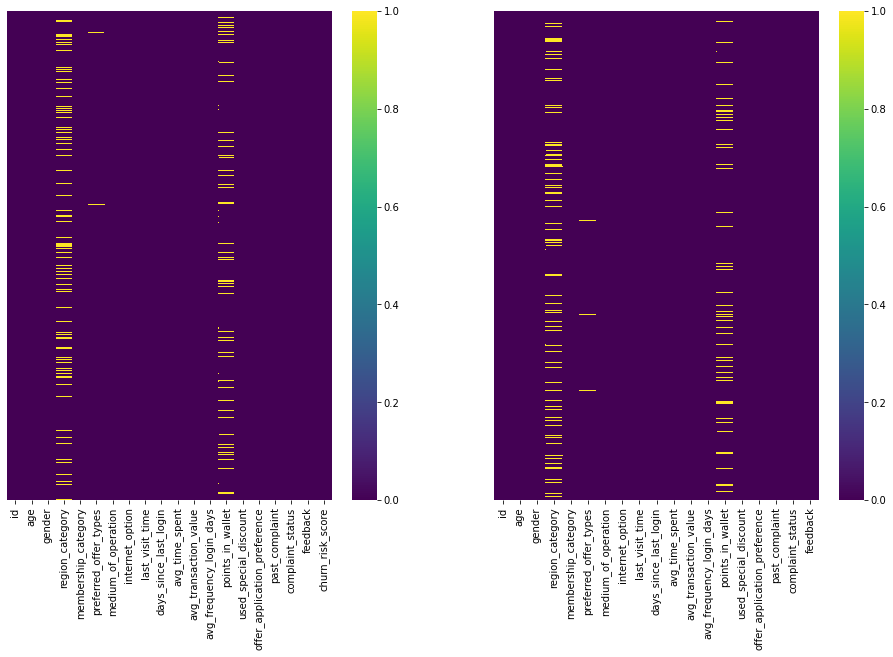

In [ ]:
def check_null(train,test):
  ''' Checking null values in dataset using heatmap''' 
  plt.figure(figsize=(16,9))
  plt.subplot(1,2,1)
  train_visual = sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')
  plt.subplot(1,2,2)
  test_visual  = sns.heatmap(test.isnull(),yticklabels=False,cmap='viridis')
  plt.show()

check_null(train_data,test_data)

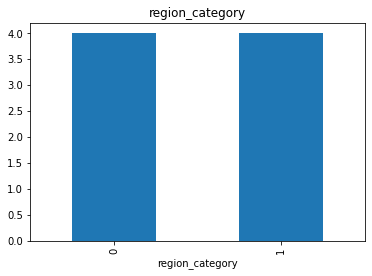

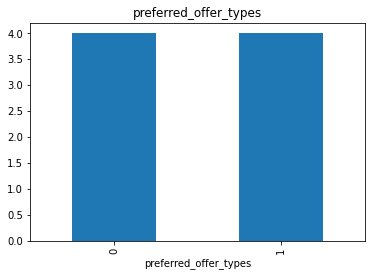

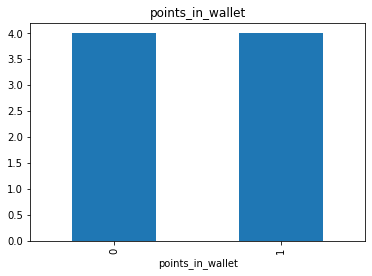

In [ ]:
def visualize_null_relationship(train):
    '''visualize the relationship of null values with target variables'''
    features_with_nan = [features for features in train.columns if train[features].isnull().sum()>=1]
    for feature in features_with_nan:
      data = train.copy()
      data[feature] = np.where(data[feature].isnull(), 1,0)
      data.groupby(feature)['churn_risk_score'].median().plot.bar()
      plt.title(feature)
      plt.show()

visualize_null_relationship(train_data)

In [ ]:
# Analysing numerical variables
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes!='O']
print("The number of numerical features in training data is {}.".format(len(numerical_features)))
train_data[numerical_features].head()

The number of numerical features in training data is 7.


,id,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,1,53,8,523.92,12067.27,765.970000,3
1,2,42,5,839.85,1684.87,637.840000,5
2,3,38,22,462.57,19576.06,648.890000,4
3,4,36,22,99.90,19549.59,646.430000,5
4,5,15,9,31.64,12125.61,1137.970074,5


In [ ]:
# Discrete Features
discrete_features = [features for features in numerical_features if len(train_data[features].unique())<=25 and features not in ['churn_risk_score']]
print("The number of discrete features are {} ".format(len(discrete_features)))
train_data[discrete_features].head()

The number of discrete features are 0 


""
0
1
2
3
4


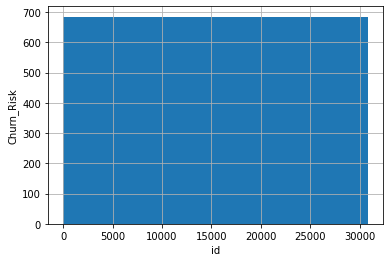

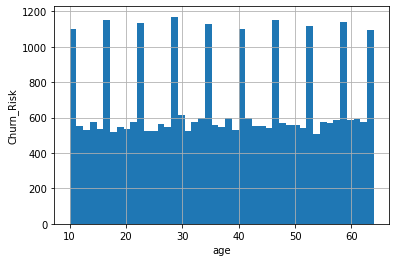

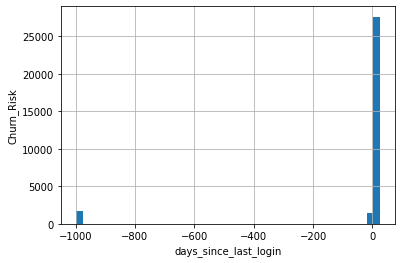

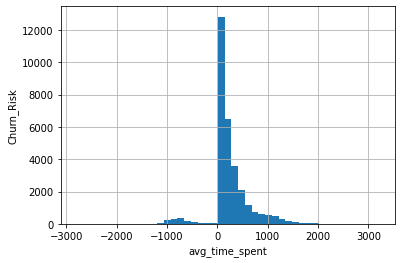

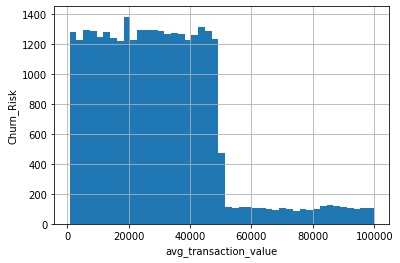

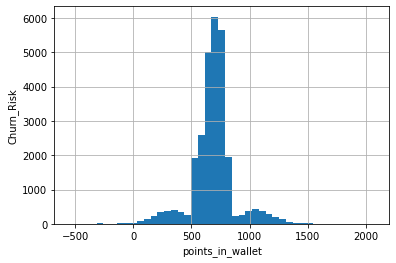

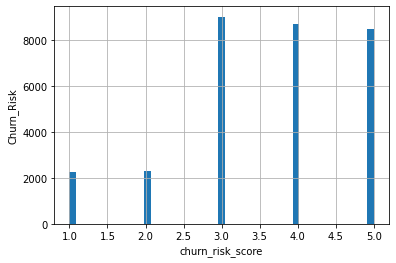

In [ ]:
# Relationship between cont. and target features
for feature in numerical_features:
  data = train_data.copy()
  data[feature].hist(bins=45)
  plt.xlabel(feature)
  plt.ylabel('Churn_Risk')
  plt.show()

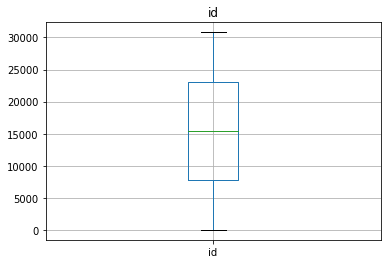

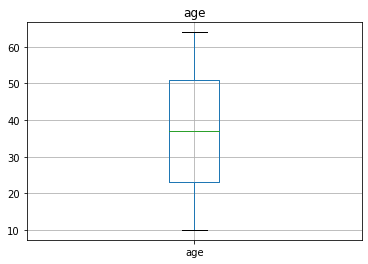

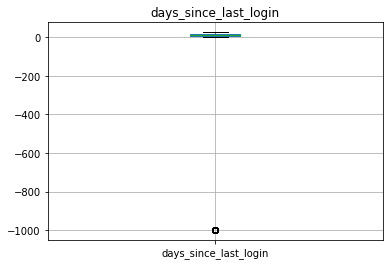

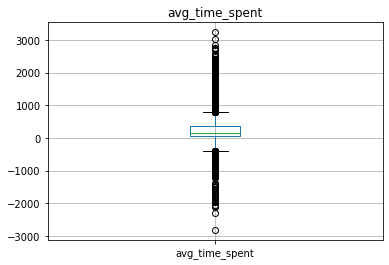

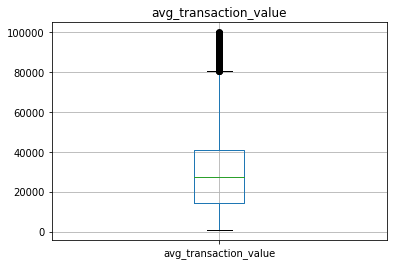

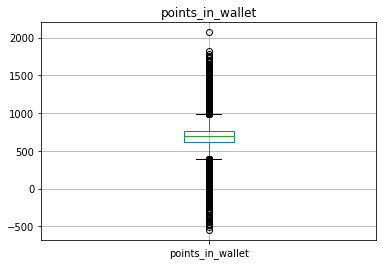

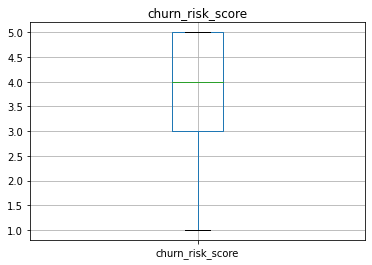

In [ ]:
#Detecting Outliers with boxplot
for feature in numerical_features:
  data_copy = train_data.copy()
  data_copy.boxplot(column=feature)
  plt.title(feature)
  plt.show()

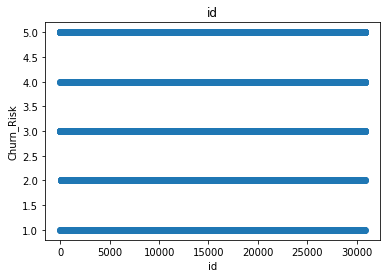

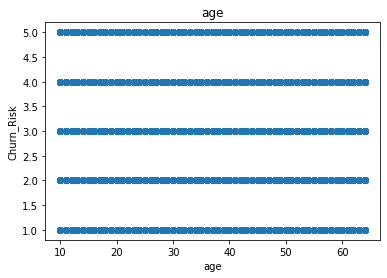

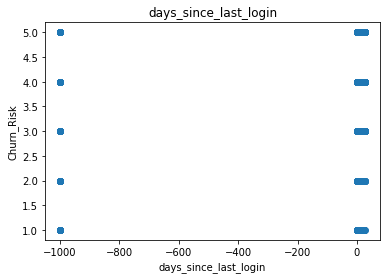

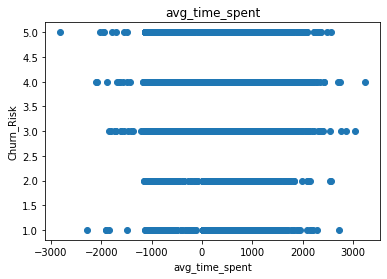

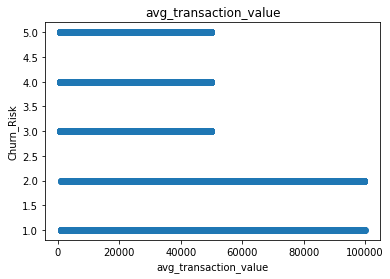

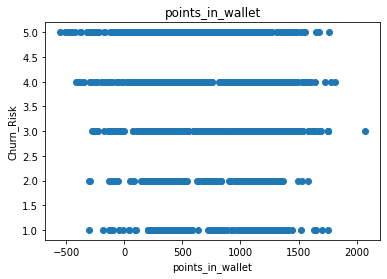

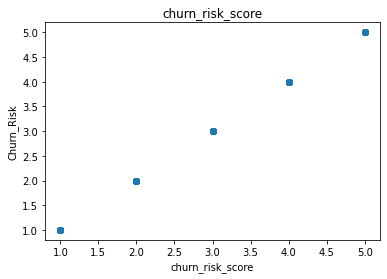

In [ ]:
#Further, visualizing outliers with scatter plot
for feature in numerical_features:
    data_copy = train_data.copy()
    plt.scatter(data_copy[feature],data_copy['churn_risk_score'])
    plt.xlabel(feature)
    plt.ylabel('Churn_Risk')
    plt.title(feature)
    plt.show()

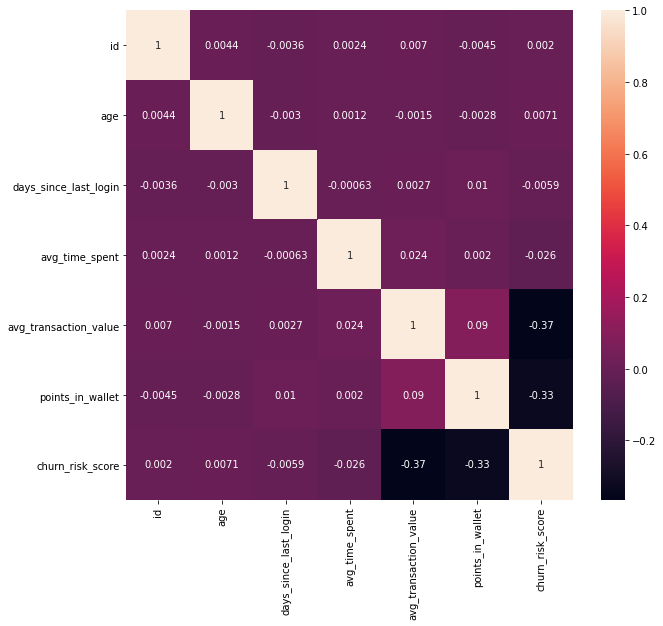

In [ ]:
# Computing the correlation b/w the features
plt.figure(figsize=(10,9))
sns.heatmap(train_data[numerical_features].corr(),annot=True)

In [ ]:
# Analysing Categorical Features 
categorical_features = [feature for feature in train_data.columns if feature not in numerical_features]
print("Total number of categorical features are {}".format(len(categorical_features)))
train_data[categorical_features].head()

Total number of categorical features are 13


,gender,region_category,membership_category,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,M,City,Platinum Membership,Gift Vouchers/Coupons,?,Mobile_Data,11:27:02,Error,No,Yes,Yes,No Information Available,Poor Customer Service
1,M,Town,Basic Membership,Without Offers,Desktop,Fiber_Optic,04:53:09,5,No,Yes,Yes,Solved in Follow-up,No reason specified
2,F,Village,No Membership,Credit/Debit Card Offers,Desktop,Mobile_Data,08:18:32,6,Yes,Yes,No,Not Applicable,Too many ads
3,M,Town,No Membership,Without Offers,Desktop,Mobile_Data,23:56:29,25,No,Yes,Yes,Solved in Follow-up,Poor Product Quality
4,F,Town,No Membership,Credit/Debit Card Offers,Smartphone,Wi-Fi,10:22:11,19,No,Yes,No,Not Applicable,No reason specified


In [ ]:
# Determining the cadinality of features
for features in categorical_features:
  print("The name of the features is {} and its cardinality is {} ".format(features,len(train_data[features].unique())))

The name of the features is gender and its cardinality is 3 
The name of the features is region_category and its cardinality is 4 
The name of the features is membership_category and its cardinality is 6 
The name of the features is preferred_offer_types and its cardinality is 4 
The name of the features is medium_of_operation and its cardinality is 4 
The name of the features is internet_option and its cardinality is 3 
The name of the features is last_visit_time and its cardinality is 25892 
The name of the features is avg_frequency_login_days and its cardinality is 1382 
The name of the features is used_special_discount and its cardinality is 2 
The name of the features is offer_application_preference and its cardinality is 2 
The name of the features is past_complaint and its cardinality is 2 
The name of the features is complaint_status and its cardinality is 5 
The name of the features is feedback and its cardinality is 9 


In [ ]:
# Visualizing relationship of categorical variables with target
for feature in categorical_features:
    data_copy = train_data.copy()
    print(feature,chi2_contingency(pd.crosstab(data_copy[feature],train_data['churn_risk_score'])))

gender (6.909241008401993, 0.5464558804457427, 8, array([[1.12969617e+03, 1.15771343e+03, 4.51778405e+03, 4.36168786e+03,
        4.24911849e+03],
       [1.12493292e+03, 1.15283205e+03, 4.49873527e+03, 4.34329724e+03,
        4.23120251e+03],
       [3.37091487e+00, 3.45451595e+00, 1.34806737e+01, 1.30148963e+01,
        1.26789991e+01]]))
region_category (64.72385122172503, 5.472536936194477e-11, 8, array([[ 781.89255003,  798.8638612 , 3118.68046572, 3001.09352408,
        2919.46959897],
       [ 865.97176775,  884.76805418, 3454.04139715, 3323.80998402,
        3233.4087969 ],
       [ 287.13568222,  293.36808462, 1145.27813713, 1102.0964919 ,
        1072.12160414]]))
membership_category (27112.680367088647, 0.0, 20, array([[ 470.82887093,  482.50576056, 1882.89845195, 1817.84149547,
        1770.92542109],
       [ 416.08814461,  426.40742544, 1663.98403271, 1606.4908967 ,
        1565.02950054],
       [ 471.34183624,  483.03144777, 1884.94985883, 1819.82202317,
        1772.85

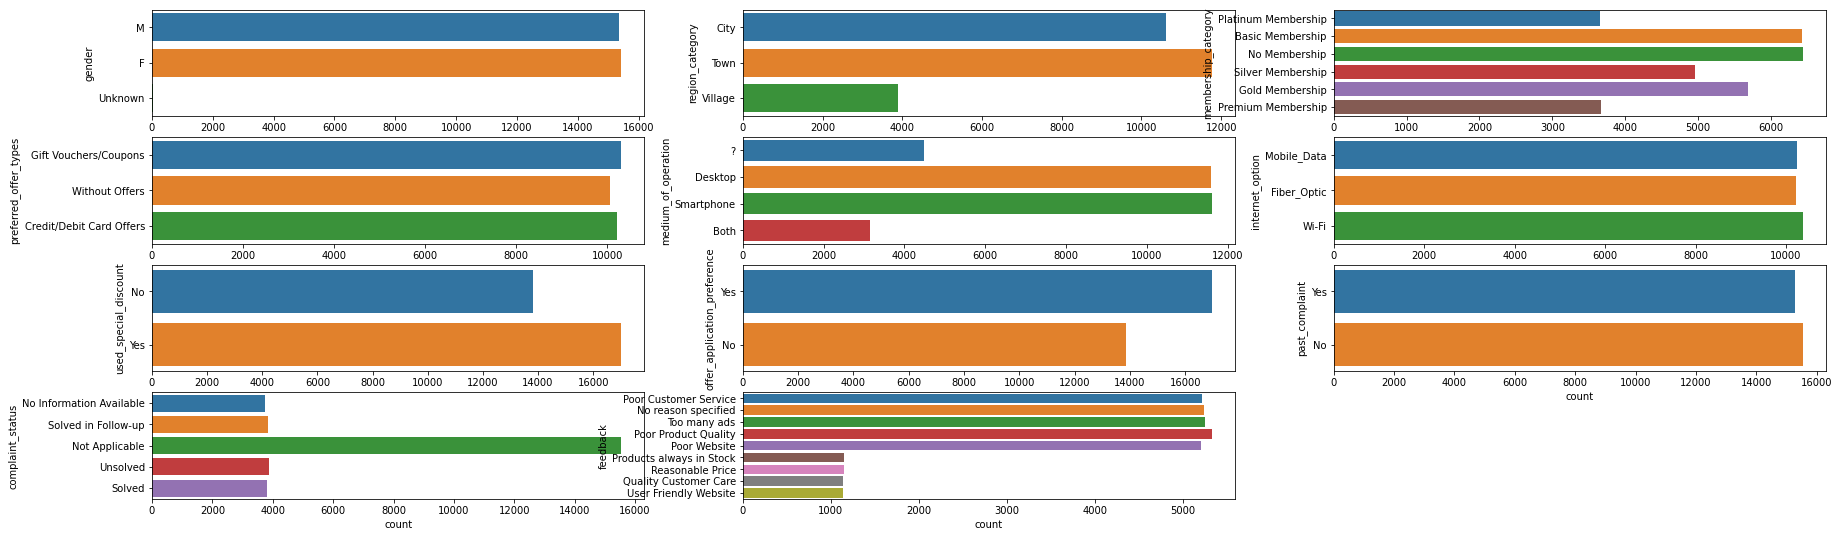

In [ ]:
# Plotting a countplot for columns having cardinality less than 10
card_less_than_10 = [feature for feature in categorical_features if len(train_data[feature].unique())<=10]
plt.figure(figsize=(30,9))
for i in range(0,len(card_less_than_10)):
    plt.subplot(4,3,i+1)
    sns.countplot(y=train_data[card_less_than_10[i]])

In [ ]:
train_data['churn_risk_score'].value_counts()

3    9030
4    8718
5    8493
2    2314
1    2258
Name: churn_risk_score, dtype: int64

**DATA CLEANING**

In [ ]:
# Converting records having churn rate == -1 to 1 .
training_data = train_data.copy()
training_data['churn_risk_score'] = training_data['churn_risk_score'].apply(lambda x:1 if x==-1 else 0 if x==5 else x)
training_data.shape

(30813, 20)

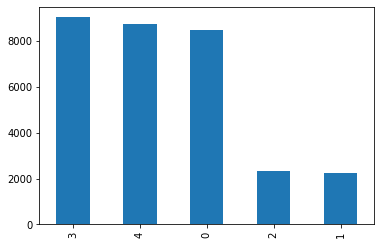

In [ ]:
training_data['churn_risk_score'].value_counts().plot.bar()

In [ ]:
training_data.head()


,id,age,gender,region_category,membership_category,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,1,53,M,City,Platinum Membership,Gift Vouchers/Coupons,?,Mobile_Data,11:27:02,8,523.92,12067.27,Error,765.970000,No,Yes,Yes,No Information Available,Poor Customer Service,3
1,2,42,M,Town,Basic Membership,Without Offers,Desktop,Fiber_Optic,04:53:09,5,839.85,1684.87,5,637.840000,No,Yes,Yes,Solved in Follow-up,No reason specified,0
2,3,38,F,Village,No Membership,Credit/Debit Card Offers,Desktop,Mobile_Data,08:18:32,22,462.57,19576.06,6,648.890000,Yes,Yes,No,Not Applicable,Too many ads,4
3,4,36,M,Town,No Membership,Without Offers,Desktop,Mobile_Data,23:56:29,22,99.90,19549.59,25,646.430000,No,Yes,Yes,Solved in Follow-up,Poor Product Quality,0
4,5,15,F,Town,No Membership,Credit/Debit Card Offers,Smartphone,Wi-Fi,10:22:11,9,31.64,12125.61,19,1137.970074,No,Yes,No,Not Applicable,No reason specified,0


In [ ]:
# Handling Misssing values in Numerical Variables
def missing_numerical(train,test,feature):
  median_value_train = train[feature].median()
  median_value_test  = test[feature].median()
  train[feature+'_nan'] = np.where(train[feature].isnull(),1,0)
  train[feature] = np.where(train[feature].isnull(),median_value_train,train[feature])
  test[feature+'_nan'] = np.where(test[feature].isnull(),1,0)
  test[feature]  = np.where(test[feature].isnull(),median_value_test,test[feature])
  return train,test

training_data,test_data = missing_numerical(training_data,test_data,'points_in_wallet')

In [ ]:
# Dropping Id Column as it doesn't contributes in prediction
training_data = training_data.drop(['id'],axis=1)
testing_data = test_data.copy()
testing_data = testing_data.drop(['id'],axis=1)

In [ ]:
# Handling Categorical Variables in dataset
categorical_var = ['region_category', 'preferred_offer_types','joined_through_referral','medium_of_operation']

def calc_mode(data,feature):
  return data[feature].mode()

def categorical_null(train,test,features):
  for feature in features[0:2]:
    train[feature+"_nan"] = np.where(train[feature].isnull(),1,0) 
    train[feature] = np.where(train[feature].isnull(),calc_mode(train,feature),train[feature])
    test[feature+"_nan"] = np.where(test[feature].isnull(),1,0)  
    test[feature] = np.where(test[feature].isnull(),calc_mode(test,feature),test[feature]) 


  for feature in features[3:]:
    train[feature+"_missing"] = np.where(train[feature]=="?",1,0)  
    train[feature] = np.where(train[feature]=='?',calc_mode(train,feature),train[feature])
    test[feature+"_missing"] = np.where(test[feature]=="?",1,0) 
    test[feature] = np.where(test[feature]=='?',calc_mode(test,feature),test[feature]) 

  return train,test

training_data,testing_data = categorical_null(training_data,testing_data,categorical_var)

In [ ]:
training_data.isnull().any()

age                             False
gender                          False
region_category                 False
membership_category             False
preferred_offer_types           False
medium_of_operation             False
internet_option                 False
last_visit_time                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days        False
points_in_wallet                False
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
churn_risk_score                False
points_in_wallet_nan            False
region_category_nan             False
preferred_offer_types_nan       False
medium_of_operation_missing     False
dtype: bool

In [ ]:
testing_data.isnull().any()

age                             False
gender                          False
region_category                 False
membership_category             False
preferred_offer_types           False
medium_of_operation             False
internet_option                 False
last_visit_time                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days        False
points_in_wallet                False
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
points_in_wallet_nan            False
region_category_nan             False
preferred_offer_types_nan       False
medium_of_operation_missing     False
dtype: bool

**FEATURE ENGINEERING**

In [ ]:
# Performing Feature Engineering on Numerical Variables [age	days_since_last_login	avg_time_spent	avg_transaction_value	points_in_wallet]
numerical_features = [feature for feature in training_data.columns if training_data[feature].dtypes!='O' and feature not in ['churn_risk_score']]
features = ["age","days_since_last_login","avg_time_spent"]
def encode_neg_val(data,feature):
  '''Handle negative values'''
  data[feature] = np.where(data[feature]<0,0,data[feature])
  return data[feature]

def dsl_eng(train,test,feature):
    ''' Feature Engineering Days Since Last Login '''
    train[feature] = encode_neg_val(train,feature)
    test[feature] = encode_neg_val(test,feature)
    return train,test

def ats_eng(train,test,feature):
    ''' Feature Engineering Avg. time spent '''
    train[feature] = encode_neg_val(train,feature)
    test[feature] =  encode_neg_val(test,feature)
    return train,test

def feature_eng_numerical(train,test,features):

  ''' Feature Engineering Numerical Columns'''
  train,test = dsl_eng(train,test,features[1])  #Days Since Last Login
  train,test = ats_eng(train,test,features[2])  # avg_time_spent
  return train,test

training_data,testing_data = feature_eng_numerical(training_data,testing_data,features)

In [ ]:
training_data.head()

,age,gender,region_category,membership_category,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,points_in_wallet_nan,region_category_nan,preferred_offer_types_nan,medium_of_operation_missing
0,53,M,City,Platinum Membership,Gift Vouchers/Coupons,Smartphone,Mobile_Data,11:27:02,8,523.92,12067.27,Error,765.970000,No,Yes,Yes,No Information Available,Poor Customer Service,3,0,0,0,1
1,42,M,Town,Basic Membership,Without Offers,Desktop,Fiber_Optic,04:53:09,5,839.85,1684.87,5,637.840000,No,Yes,Yes,Solved in Follow-up,No reason specified,0,0,0,0,0
2,38,F,Village,No Membership,Credit/Debit Card Offers,Desktop,Mobile_Data,08:18:32,22,462.57,19576.06,6,648.890000,Yes,Yes,No,Not Applicable,Too many ads,4,0,0,0,0
3,36,M,Town,No Membership,Without Offers,Desktop,Mobile_Data,23:56:29,22,99.90,19549.59,25,646.430000,No,Yes,Yes,Solved in Follow-up,Poor Product Quality,0,0,0,0,0
4,15,F,Town,No Membership,Credit/Debit Card Offers,Smartphone,Wi-Fi,10:22:11,9,31.64,12125.61,19,1137.970074,No,Yes,No,Not Applicable,No reason specified,0,0,0,0,0


In [ ]:
testing_data.head()

,age,gender,region_category,membership_category,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,points_in_wallet_nan,region_category_nan,preferred_offer_types_nan,medium_of_operation_missing
0,34,M,City,Basic Membership,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,08:35:05,10,89.76,21318.19,6,696.98,No,Yes,No,Not Applicable,Poor Product Quality,1,0,0,0
1,39,M,Town,No Membership,Credit/Debit Card Offers,Smartphone,Fiber_Optic,15:39:05,9,241.74,33170.16,6,551.11,Yes,No,Yes,No Information Available,No reason specified,0,0,0,0
2,26,M,Town,No Membership,Without Offers,Desktop,Wi-Fi,14:55:59,3,215.89,41979.65,9,696.98,No,Yes,No,Not Applicable,Too many ads,1,1,0,0
3,36,M,Village,Silver Membership,Gift Vouchers/Coupons,Desktop,Mobile_Data,06:06:05,2,691.09,17989.46,Error,696.98,No,Yes,Yes,Solved,No reason specified,1,0,0,1
4,12,M,City,Premium Membership,Without Offers,Desktop,Mobile_Data,22:27:40,8,33.09,55607.35,Error,696.98,Yes,No,No,Not Applicable,User Friendly Website,1,0,0,0


In [ ]:
# Performing Feature Engineering on Categorical Variables 
categorical_feat = ['avg_frequency_login_days']




def alg_eng(train,test,feature):
  ''' Feature Eng. Avg Login Days'''
  train[feature] = calc_login_act(train,feature)
  test[feature] =  calc_login_act(test,feature)
  return train,test



def categorical_eng(train,test,features):
  ''' Feature Engineering Categorical Variables'''

  
  train,test = alg_eng(train,test,features[0]) #avg_login_days
  
  return train,test

training_data,testing_data = categorical_eng(training_data,testing_data,categorical_feat)


In [ ]:
training_data.head()

,age,gender,region_category,membership_category,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,points_in_wallet_nan,region_category_nan,preferred_offer_types_nan,medium_of_operation_missing
0,53,M,City,Platinum Membership,Gift Vouchers/Coupons,Smartphone,Mobile_Data,8,523.92,12067.27,0,765.970000,No,Yes,Yes,No Information Available,Poor Customer Service,3,0,0,0,1
1,42,M,Town,Basic Membership,Without Offers,Desktop,Fiber_Optic,5,839.85,1684.87,5,637.840000,No,Yes,Yes,Solved in Follow-up,No reason specified,0,0,0,0,0
2,38,F,Village,No Membership,Credit/Debit Card Offers,Desktop,Mobile_Data,22,462.57,19576.06,6,648.890000,Yes,Yes,No,Not Applicable,Too many ads,4,0,0,0,0
3,36,M,Town,No Membership,Without Offers,Desktop,Mobile_Data,22,99.90,19549.59,25,646.430000,No,Yes,Yes,Solved in Follow-up,Poor Product Quality,0,0,0,0,0
4,15,F,Town,No Membership,Credit/Debit Card Offers,Smartphone,Wi-Fi,9,31.64,12125.61,19,1137.970074,No,Yes,No,Not Applicable,No reason specified,0,0,0,0,0


In [ ]:
testing_data.head()

,age,gender,region_category,membership_category,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,points_in_wallet_nan,region_category_nan,preferred_offer_types_nan,medium_of_operation_missing
0,34,M,City,Basic Membership,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,10,89.76,21318.19,6,696.98,No,Yes,No,Not Applicable,Poor Product Quality,1,0,0,0
1,39,M,Town,No Membership,Credit/Debit Card Offers,Smartphone,Fiber_Optic,9,241.74,33170.16,6,551.11,Yes,No,Yes,No Information Available,No reason specified,0,0,0,0
2,26,M,Town,No Membership,Without Offers,Desktop,Wi-Fi,3,215.89,41979.65,9,696.98,No,Yes,No,Not Applicable,Too many ads,1,1,0,0
3,36,M,Village,Silver Membership,Gift Vouchers/Coupons,Desktop,Mobile_Data,2,691.09,17989.46,0,696.98,No,Yes,Yes,Solved,No reason specified,1,0,0,1
4,12,M,City,Premium Membership,Without Offers,Desktop,Mobile_Data,8,33.09,55607.35,0,696.98,Yes,No,No,Not Applicable,User Friendly Website,1,0,0,0


In [ ]:
# Seperating independent and dependent features
y = training_data['churn_risk_score']
X_train = training_data.drop(columns=['churn_risk_score'],axis=1)
X_test = testing_data.copy()

In [ ]:
# Encoding Categorical Variables

cols_to_encode = ['membership_category',
              'gender','region_category',
               'preferred_offer_types','medium_of_operation','internet_option',
               'used_special_discount','offer_application_preference','past_complaint',
               'complaint_status','feedback']
               

X_train_le = X_train.copy()
X_test_le  = X_test.copy()

def label_encode(data,features):
  dummies = data.copy()
  dummies = pd.get_dummies(dummies[features])
  data = pd.concat([data,dummies],axis=1)
  data = data.drop(columns=features,axis=1)

  return data

X_train_le = label_encode(X_train_le,cols_to_encode)
X_test_le  = label_encode(X_test_le,cols_to_encode)

In [ ]:
X_train_le.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,points_in_wallet_nan,region_category_nan,preferred_offer_types_nan,medium_of_operation_missing,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,53,8,523.92,12067.27,0,765.970000,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,42,5,839.85,1684.87,5,637.840000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,38,22,462.57,19576.06,6,648.890000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,36,22,99.90,19549.59,25,646.430000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,15,9,31.64,12125.61,19,1137.970074,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
X_test_le.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,points_in_wallet_nan,region_category_nan,preferred_offer_types_nan,medium_of_operation_missing,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,34,10,89.76,21318.19,6,696.98,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,39,9,241.74,33170.16,6,551.11,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,26,3,215.89,41979.65,9,696.98,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,36,2,691.09,17989.46,0,696.98,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,12,8,33.09,55607.35,0,696.98,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


**FEATURE SCALING**

In [ ]:
# First transforming numerical variables to gaussian curve using power transformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
cols_to_pt = ['age','points_in_wallet','avg_time_spent','avg_transaction_value']
X_train_pt = X_train_le.copy()
X_test_pt  = X_test_le.copy()
X_train_pt = pd.DataFrame(pt.fit_transform(X_train_pt[cols_to_pt]),columns=cols_to_pt)
X_train_transformed = X_train_le.drop(columns=cols_to_pt)
X_train_ptransformed = pd.concat([X_train_pt,X_train_transformed],axis=1)
X_test_pt  = pd.DataFrame(pt.transform(X_test_pt[cols_to_pt]),columns=cols_to_pt)
X_test_transformed = X_test_le.drop(columns=cols_to_pt)
X_test_ptransformed = pd.concat([X_test_transformed,X_test_pt],axis=1)

In [ ]:
# Standardizing using Standard Scaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train_ptransformed),columns= X_train_ptransformed.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test_ptransformed),columns = X_test_ptransformed.columns)

In [ ]:
X_train_scaled.head()

,age,points_in_wallet,avg_time_spent,avg_transaction_value,days_since_last_login,avg_frequency_login_days,points_in_wallet_nan,region_category_nan,preferred_offer_types_nan,medium_of_operation_missing,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.993161,0.413213,1.025040,-0.857715,-0.660785,-1.453789,-0.320729,-0.41521,-0.088041,2.421909,-0.513273,-0.47529,-0.513626,2.72926,-0.367652,-0.438117,-1.000617,1.003609,-0.038667,1.378917,-1.059296,-0.380672,-0.704217,1.387280,-0.696342,-0.33685,-0.776052,0.956515,-0.704217,1.418147,-0.711966,1.109744,-1.109744,-0.90395,0.90395,-1.007983,1.007983,2.684373,-1.007983,-0.376245,-0.376639,-0.379554,-0.452819,2.216032,-0.457132,-0.45084,-0.196453,-0.195828,-0.197076,-0.453391,-0.195739
1,0.352207,-0.298067,1.538874,-2.089370,-1.148297,-0.950915,-0.320729,-0.41521,-0.088041,-0.412897,1.948281,-0.47529,-0.513626,-0.36640,-0.367652,-0.438117,-1.000617,1.003609,-0.038667,-0.725207,0.944023,-0.380672,-0.704217,-0.720835,1.436076,-0.33685,1.288573,-1.045462,1.420016,-0.705146,-0.711966,1.109744,-1.109744,-0.90395,0.90395,-1.007983,1.007983,-0.372526,-1.007983,-0.376245,2.655066,-0.379554,2.208388,-0.451257,-0.457132,-0.45084,-0.196453,-0.195828,-0.197076,-0.453391,-0.195739
2,0.109383,-0.237391,0.898793,-0.339454,1.614270,-0.850341,-0.320729,-0.41521,-0.088041,-0.412897,-0.513273,-0.47529,1.946941,-0.36640,-0.367652,-0.438117,0.999384,-0.996404,-0.038667,-0.725207,-1.059296,2.626932,1.420016,-0.720835,-0.696342,-0.33685,1.288573,-1.045462,-0.704217,1.418147,-0.711966,-0.901108,0.901108,-0.90395,0.90395,0.992080,-0.992080,-0.372526,0.992080,-0.376245,-0.376639,-0.379554,-0.452819,-0.451257,-0.457132,-0.45084,-0.196453,-0.195828,-0.197076,2.205601,-0.195739
3,-0.014320,-0.250911,-0.381989,-0.341072,1.614270,1.060578,-0.320729,-0.41521,-0.088041,-0.412897,-0.513273,-0.47529,1.946941,-0.36640,-0.367652,-0.438117,-1.000617,1.003609,-0.038667,-0.725207,0.944023,-0.380672,-0.704217,-0.720835,1.436076,-0.33685,1.288573,-1.045462,-0.704217,1.418147,-0.711966,1.109744,-1.109744,-0.90395,0.90395,-1.007983,1.007983,-0.372526,-1.007983,-0.376245,2.655066,-0.379554,-0.452819,-0.451257,2.187554,-0.45084,-0.196453,-0.195828,-0.197076,-0.453391,-0.195739
4,-1.446347,2.558622,-1.072470,-0.853103,-0.498281,0.457130,-0.320729,-0.41521,-0.088041,-0.412897,-0.513273,-0.47529,1.946941,-0.36640,-0.367652,-0.438117,0.999384,-0.996404,-0.038667,-0.725207,0.944023,-0.380672,1.420016,-0.720835,-0.696342,-0.33685,-0.776052,0.956515,-0.704217,-0.705146,1.404562,1.109744,-1.109744,-0.90395,0.90395,0.992080,-0.992080,-0.372526,0.992080,-0.376245,-0.376639,-0.379554,2.208388,-0.451257,-0.457132,-0.45084,-0.196453,-0.195828,-0.197076,-0.453391,-0.195739


In [ ]:
X_test_scaled.head()

,days_since_last_login,avg_frequency_login_days,points_in_wallet_nan,region_category_nan,preferred_offer_types_nan,medium_of_operation_missing,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,age,points_in_wallet,avg_time_spent,avg_transaction_value
0,-0.332194,-0.845862,3.121041,-0.413362,-0.088521,-0.416663,1.945831,-0.466343,-0.509577,-0.35272,-0.382087,-0.449779,-0.987321,0.991266,-0.044695,1.399747,-1.067676,-0.385506,-0.698560,1.386137,-0.701405,-0.346977,-1.052408,1.313243,1.431517,-0.722388,-0.700456,1.085370,-1.085370,-0.880311,0.880311,1.012034,-1.012034,-0.38789,1.012034,-0.384482,-0.373819,-0.375895,-0.444965,-0.449458,2.252252,-0.453298,-0.203785,-0.194036,-0.219219,-0.449138,-0.208514,-0.139830,0.035212,-0.457517,-0.243594
1,-0.496782,-0.845862,-0.320406,-0.413362,-0.088521,-0.416663,-0.513919,-0.466343,1.962413,-0.35272,-0.382087,-0.449779,-0.987321,0.991266,-0.044695,-0.714415,0.936614,-0.385506,1.431517,-0.721430,-0.701405,-0.346977,-1.052408,1.313243,1.431517,-0.722388,-0.700456,-0.921345,0.921345,1.135963,-1.135963,-0.988109,0.988109,2.57805,-0.988109,-0.384482,-0.373819,-0.375895,2.247368,-0.449458,-0.444000,-0.453298,-0.203785,-0.194036,-0.219219,-0.449138,-0.208514,0.168743,-0.737943,0.286711,0.360785
2,-1.484309,-0.541859,3.121041,2.419186,-0.088521,-0.416663,-0.513919,-0.466343,1.962413,-0.35272,-0.382087,-0.449779,-0.987321,0.991266,-0.044695,-0.714415,0.936614,-0.385506,-0.698560,-0.721430,1.425710,-0.346977,0.950202,-0.761474,-0.698560,-0.722388,1.427641,1.085370,-1.085370,-0.880311,0.880311,1.012034,-1.012034,-0.38789,1.012034,-0.384482,-0.373819,-0.375895,-0.444965,-0.449458,-0.444000,-0.453298,-0.203785,-0.194036,-0.219219,2.226487,-0.208514,-0.657658,0.035212,0.192474,0.737268
3,-1.648897,-1.453867,3.121041,-0.413362,-0.088521,2.400022,-0.513919,-0.466343,-0.509577,-0.35272,-0.382087,2.223315,-0.987321,0.991266,-0.044695,-0.714415,-1.067676,2.593996,-0.698560,1.386137,-0.701405,-0.346977,0.950202,-0.761474,-0.698560,1.384297,-0.700456,1.085370,-1.085370,-0.880311,0.880311,-0.988109,0.988109,-0.38789,-0.988109,2.600905,-0.373819,-0.375895,2.247368,-0.449458,-0.444000,-0.453298,-0.203785,-0.194036,-0.219219,-0.449138,-0.208514,-0.015173,0.035212,1.295389,-0.444606
4,-0.661370,-1.453867,3.121041,-0.413362,-0.088521,-0.416663,-0.513919,-0.466343,-0.509577,-0.35272,2.617206,-0.449779,-0.987321,0.991266,-0.044695,1.399747,-1.067676,-0.385506,-0.698560,-0.721430,1.425710,-0.346977,0.950202,-0.761474,-0.698560,1.384297,-0.700456,-0.921345,0.921345,1.135963,-1.135963,1.012034,-1.012034,-0.38789,1.012034,-0.384482,-0.373819,-0.375895,-0.444965,-0.449458,-0.444000,-0.453298,-0.203785,-0.194036,-0.219219,-0.449138,4.795832,-1.673317,0.035212,-1.044526,1.244110


**FEATURE SELECTION**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_train_scaled,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

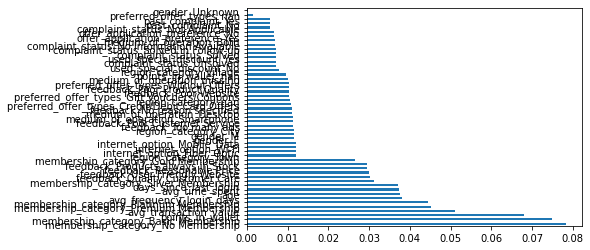

In [ ]:
feat_importances=pd.Series(model.feature_importances_,index=X_train_scaled.columns)
feat_importances.nlargest(66).plot(kind='barh')

In [ ]:
# Model Splitting
x_train,x_test,y_train,y_test = train_test_split(X_train_scaled,y,test_size=0.1,random_state=1,stratify=y)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.1,random_state=1,stratify = y_train)

**MODEL BUILDING**

**Logistic Regression**

In [ ]:
model_1 = LogisticRegression(max_iter=400)
model_1.fit(x_train,y_train.values.ravel())
predictions_1 = model_1.predict(x_valid)
score_1 = f1_score(y_valid,predictions_1,average='macro')
score_1

0.6676259932950659

In [ ]:
predictions_1 = model_1.predict(x_test)
score_1 = f1_score(y_test,predictions_1,average='macro')
score_1

0.6786087883021427

**KNN**

In [ ]:
model_2 = KNeighborsClassifier()
model_2.fit(x_train,y_train)
predictions_2 = model_2.predict(x_valid)
score_2 = f1_score(y_valid,predictions_2,average='macro')
score_2

0.5938235712495313

In [ ]:
predictions_2 = model_2.predict(x_test)
score_2 = f1_score(y_test,predictions_2,average='macro')
score_2

0.6047896183172219

**SVM**

In [ ]:
model_3 = SVC()
model_3.fit(x_train,y_train.values.ravel())
predictions_3 = model_3.predict(x_valid)
score_3 = f1_score(y_valid,predictions_3,average='macro')
score_3

0.6348198589559805

In [ ]:
predictions_3 = model_3.predict(x_test)
score_3 = f1_score(y_test,predictions_3,average='macro')
score_3

0.6496241745299163

**DECISION TREE**

In [ ]:
model_4 = DecisionTreeClassifier()
model_4.fit(x_train,y_train.values.ravel())
predictions_4 = model_4.predict(x_valid)
score_4 = f1_score(y_valid,predictions_4,average='macro')
score_4

0.7469467673158985

In [ ]:
predictions_4 = model_4.predict(x_test)
score_4 = f1_score(y_test,predictions_4,average='macro')
score_4

0.7512111202868937

**RANDOM Forest**

In [ ]:
model_5 = RandomForestClassifier()
model_5.fit(x_train,y_train.values.ravel())
predictions_5 = model_5.predict(x_valid)
score_5 = f1_score(y_valid,predictions_5,average='macro')
score_5

0.7638254666855896

In [ ]:
predictions_5 = model_5.predict(x_test)
score_5 = f1_score(y_test,predictions_5,average='macro')
score_5

0.7455964628331475

**XG BOOST**

In [ ]:
from xgboost import XGBClassifier
model_6 = XGBClassifier()
model_6.fit(x_train,y_train.values.ravel())
predictions_6 = model_6.predict(x_valid)
score_6 = f1_score(y_valid,predictions_6,average='macro')
score_6

0.7483667042353618

In [ ]:
predictions_6 = model_6.predict(x_test)
score_6 = f1_score(y_test,predictions_6,average='macro')
score_6

0.7625924293996318

1.CatBoost Classifier

In [ ]:
pip install catboost

     |████████████████████████████████| 67.4 MB 30 kB/s 


In [ ]:
import catboost as cb
cat_model = cb.CatBoostClassifier(verbose=2,iterations=90,depth=3,learning_rate=0.2,bagging_temperature=0.8,border_count=236,l2_leaf_reg=2)
cat_model.fit(x_train,y_train,eval_set=(x_valid,y_valid))
print(cat_model.best_score_)

0:	learn: 1.3789243	test: 1.3781704	best: 1.3781704 (0)	total: 65.1ms	remaining: 5.8s
2:	learn: 1.1015884	test: 1.1055621	best: 1.1055621 (2)	total: 100ms	remaining: 2.91s
4:	learn: 0.9551323	test: 0.9593612	best: 0.9593612 (4)	total: 135ms	remaining: 2.29s
6:	learn: 0.8631509	test: 0.8710547	best: 0.8710547 (6)	total: 170ms	remaining: 2.01s
8:	learn: 0.7855586	test: 0.7924044	best: 0.7924044 (8)	total: 204ms	remaining: 1.83s
10:	learn: 0.7315601	test: 0.7368657	best: 0.7368657 (10)	total: 237ms	remaining: 1.7s
12:	learn: 0.6810815	test: 0.6862237	best: 0.6862237 (12)	total: 281ms	remaining: 1.66s
14:	learn: 0.6395065	test: 0.6451492	best: 0.6451492 (14)	total: 316ms	remaining: 1.58s
16:	learn: 0.6098910	test: 0.6142200	best: 0.6142200 (16)	total: 350ms	remaining: 1.5s
18:	learn: 0.5836999	test: 0.5884468	best: 0.5884468 (18)	total: 383ms	remaining: 1.43s
20:	learn: 0.5625424	test: 0.5680934	best: 0.5680934 (20)	total: 416ms	remaining: 1.37s
22:	learn: 0.5474891	test: 0.5536039	best: 0

In [ ]:
predictions_8 = cat_model.predict(x_test)
score_8 = f1_score(y_test,predictions_8,average='macro')
score_8

0.768946092678295

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,predictions_8)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       850
           1       0.70      0.86      0.78       226
           2       0.83      0.65      0.73       231
           3       0.90      0.93      0.92       903
           4       0.85      0.48      0.61       872

    accuracy                           0.79      3082
   macro avg       0.80      0.78      0.77      3082
weighted avg       0.81      0.79      0.78      3082



Since,Catbbost Algorithm gives the higest f1-score, therefore we choose it as the final model for the prediction.

**Prediction on Test Data**

In [ ]:
final_predictions = pd.DataFrame(cat_model.predict(X_test_scaled))
final_predictions.columns = ['churn_risk_score']
final_predictions = pd.concat([test_data["id"],final_predictions],axis=1)
final_predictions.head()

,id,churn_risk_score
0,30814,0
1,30815,0
2,30816,0
3,30817,4
4,30818,1


In [ ]:
final_predictions['churn_risk_score'].value_counts()

0    1947
3    1473
4     775
1     473
2     348
Name: churn_risk_score, dtype: int64

In [ ]:
final_predictions['churn_risk_score'] = final_predictions['churn_risk_score'].apply(lambda x:5 if x==0 else x)

In [ ]:
final_predictions.to_csv('./M Ramesh.csv', index=False)